In [2]:
import importlib
import matplotlib.pyplot as plt
import plot_utils as plt_utils
import numpy as np

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [3]:
league_standing_pytable = MyPyTable()
league_standing_pytable.load_from_file("lib/nhl_leaguestandings.csv")

### Class Data Analysis

In [4]:
class_col = league_standing_pytable.get_column("PLAYOFFS")
print("Total Instances: ", len(class_col))

group_names, group_instances = myutils.group_by(league_standing_pytable.data, league_standing_pytable.column_names, "PLAYOFFS")

print("Avalible Classifications and Total Number Of Class Encountered")
for i in range(len(group_names)):
    print("  " + group_names[i] + " : " + str(len(group_instances[i])))

year_col = league_standing_pytable.get_column("SEASON")
print("Most recent year in data: ", int(max(year_col)))
print("Earliest year accounted for in data: ", int(min(year_col)))

print("Number of teams in recent year: ", year_col.count(max(year_col)))
print("Number of teams in earliest year: ", year_col.count(min(year_col)))

Total Instances:  1350
Avalible Classifications and Total Number Of Class Encountered
  N : 508
  Y : 842
Most recent year in data:  2018
Earliest year accounted for in data:  1940
Number of teams in recent year:  31
Number of teams in earliest year:  7


### EDA 1 - Wins vs Losses with a line for play off cutoffs

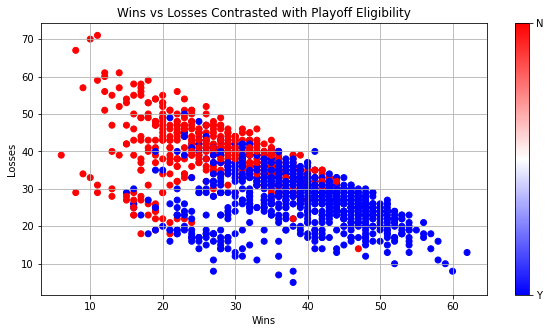

In [11]:
importlib.reload(mysklearn)

dataset_titles = league_standing_pytable.column_names
dataset = league_standing_pytable.data
x_col_name = "W"
y_col_name = "L"
groupby_col = "PLAYOFFS"

wins_col = league_standing_pytable.get_column(x_col_name)
losses_col = league_standing_pytable.get_column(y_col_name)
class_col = league_standing_pytable.get_column(groupby_col)

unique_class_vals, parallel_numbered_vals = myutils.unique_vals(class_col)

x_index = dataset_titles.index(x_col_name)
y_index = dataset_titles.index(y_col_name)

cleaned_x, cleaned_y = myutils.find_all_non_NA_matches(wins_col, losses_col)
m, b = myutils.compute_slope_intercept(cleaned_x, cleaned_y)

corre_coeff = myutils.calculate_correlation_coefficient(cleaned_x, cleaned_y)
covarience = myutils.calculate_covarience(cleaned_x, cleaned_y)

figure = plt.figure(figsize=(10,5))
figure.patch.set_facecolor('white')
plt.title("Wins" + " vs " + "Losses Contrasted with Playoff Eligibility")
plt.ylabel("Losses")
plt.xlabel("Wins")
plt.scatter(cleaned_x, cleaned_y, c = parallel_numbered_vals, marker="o", cmap="bwr")
#plt.plot([min(cleaned_x), max(cleaned_x)], [m * min(cleaned_x) + b, m * max(cleaned_x) + b], c="g")
cbar = plt.colorbar()
cbar.set_ticks([i for i in range(len(unique_class_vals))])
cbar.set_ticklabels(unique_class_vals)
plt.grid(True)
plt.show()


### EDA 2 -Points scored by a given team in the seasons
Two charts which cover the distribution of points of a given group
1. Teams who were in the playoffs
1. Teams who weren't in the playoffs

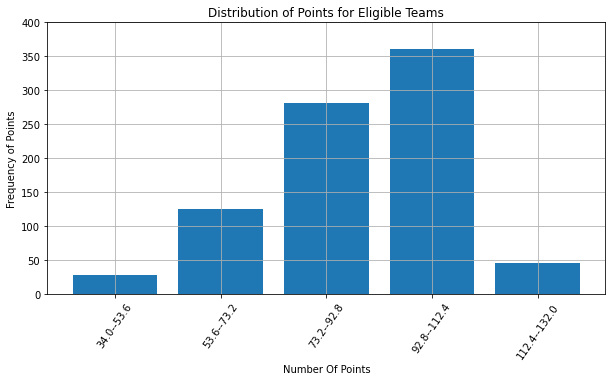

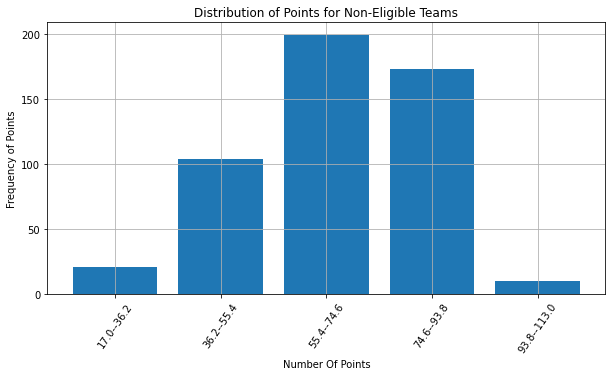

In [13]:
importlib.reload(mysklearn)

dataset_titles = league_standing_pytable.column_names
dataset = league_standing_pytable.data
x_col_name = "PTS"
groupby_col = "PLAYOFFS"

group_names, group_subtables = myutils.group_by(dataset, dataset_titles, groupby_col)
no_pytable = MyPyTable(dataset_titles, group_subtables[0])
yes_pytable = MyPyTable(dataset_titles, group_subtables[1])

yes_pts_col = yes_pytable.get_column(x_col_name)
no_pts_col = no_pytable.get_column(x_col_name)

# ------------------------------------------- 
#   for yes
# -------------------------------------------
cutoffs = myutils.compute_equal_width_cutoffs(yes_pts_col, 5)

binned_values = []
bin_labels = [i for i in range(1,6)]
bin_names = [str(cutoffs[i]) + "--" + str(cutoffs[i + 1]) for i in range(len(cutoffs) - 1)]
for i in range(len(yes_pts_col)):
    j = 0

    while yes_pts_col[i] > cutoffs[j]:
        j += 1
    binned_values.append(j)

binned_frequencies = []
for i in range(1, 6):
    binned_frequencies.append(binned_values.count(i))

figure = plt.figure(figsize=(10,5))
figure.patch.set_facecolor('white')
x_range = np.arange(len(bin_labels))
y_range = np.arange(0, max(binned_frequencies) * 1.2, 50)
plt.bar(x_range, binned_frequencies, align="center")
plt.xticks(x_range, bin_names, rotation=55)
plt.yticks(y_range)
plt.title("Distribution of Points for Eligible Teams")
plt.ylabel("Frequency of Points")
plt.xlabel("Number Of Points")
plt.grid(True)
plt.show()


# ------------------------------------------- 
#   for no
# -------------------------------------------
cutoffs = myutils.compute_equal_width_cutoffs(no_pts_col, 5)

binned_values = []
bin_labels = [i for i in range(1,6)]
bin_names = [str(cutoffs[i]) + "--" + str(cutoffs[i + 1]) for i in range(len(cutoffs) - 1)]
for i in range(len(no_pts_col)):
    j = 0

    while no_pts_col[i] > cutoffs[j]:
        j += 1
    binned_values.append(j)

binned_frequencies = []
for i in range(1, 6):
    binned_frequencies.append(binned_values.count(i))

figure = plt.figure(figsize=(10,5))
figure.patch.set_facecolor('white')
x_range = np.arange(len(bin_labels))
y_range = np.arange(0, max(binned_frequencies) * 1.2, 50)
plt.bar(x_range, binned_frequencies, align="center")
plt.xticks(x_range, bin_names, rotation=55)
plt.yticks(y_range)
plt.title("Distribution of Points for Non-Eligible Teams")
plt.ylabel("Frequency of Points")
plt.xlabel("Number Of Points")
plt.grid(True)
plt.show()

### EDA 3 - How many times teams made the payoffs

I think a better question would be, if they made it the previous year or within the past three years(up to us) are they more likley to make it the next year

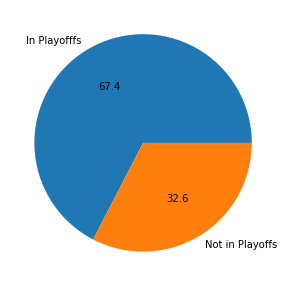

The total number of teams is 46


In [14]:
### EDA 3 - How many teams made it to playoffs in the last year


importlib.reload(mysklearn)
column_names=league_standing_pytable.column_names
table=league_standing_pytable.data
figure = plt.figure(figsize=(10,5))
figure.patch.set_facecolor('white')
 
year_col=league_standing_pytable.get_column("SEASON")
year_table=[]
year_index=column_names.index("SEASON")
team_index=column_names.index("TEAM")
playoff_index=column_names.index("PLAYOFFS")
 
for row in table:
   if row[year_index]==2018:
       year_table.append(row)
 
team_index = column_names.index("TEAM")
teams = [league_standing_pytable.data[i][team_index] for i in range(len(league_standing_pytable.data))]
team_names=[]
for i in range(len(teams)):
   if teams[i] in team_names:
       continue
   else:
       team_names.append(teams[i])
 
inP=[]
for row in year_table:
   if row[team_index] in inP:
       continue
   else:
       inP.append(row[team_index])
 
noP=len(team_names)-len(inP)
success=[len(inP), noP]
label=["In Playofffs", "Not in Playoffs"]
total_teams=len(team_names)

plt.pie(success,labels=label,autopct="%1.1F")
plt.show()
#inlcude number of teams that make it
print("The total number of teams is " + str(total_teams))

### EDA 4 Goals Scored vs Goals Against vs Playoff Eligibility

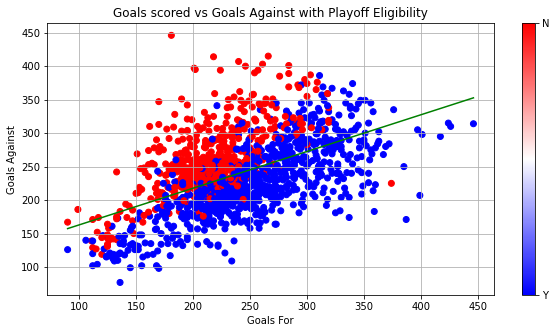

In [15]:
importlib.reload(mysklearn)

dataset_titles = league_standing_pytable.column_names
dataset = league_standing_pytable.data
x_col_name = "GF"
y_col_name = "GA"
groupby_col = "PLAYOFFS"

wins_col = league_standing_pytable.get_column(x_col_name)
losses_col = league_standing_pytable.get_column(y_col_name)
class_col = league_standing_pytable.get_column(groupby_col)

unique_class_vals, parallel_numbered_vals = myutils.unique_vals(class_col)

x_index = dataset_titles.index(x_col_name)
y_index = dataset_titles.index(y_col_name)

cleaned_x, cleaned_y = myutils.find_all_non_NA_matches(wins_col, losses_col)
m, b = myutils.compute_slope_intercept(cleaned_x, cleaned_y)

corre_coeff = myutils.calculate_correlation_coefficient(cleaned_x, cleaned_y)
covarience = myutils.calculate_covarience(cleaned_x, cleaned_y)

figure = plt.figure(figsize=(10,5))
figure.patch.set_facecolor('white')
plt.title("Goals scored vs Goals Against with Playoff Eligibility")
plt.ylabel("Goals Against")
plt.xlabel("Goals For")
plt.scatter(cleaned_x, cleaned_y, c = parallel_numbered_vals, marker="o", cmap="bwr")
plt.plot([min(cleaned_x), max(cleaned_x)], [m * min(cleaned_x) + b, m * max(cleaned_x) + b], c="g")
cbar = plt.colorbar()
cbar.set_ticks([i for i in range(len(unique_class_vals))])
cbar.set_ticklabels(unique_class_vals)
plt.grid(True)
plt.show()